<a href="https://colab.research.google.com/github/TimEdwards00/TimEdwards00.github.io/blob/main/projectPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#libraries
!pip install wbgapi
import wbgapi as wb

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from google.colab import files

import requests
import csv



In [24]:
#imported data

iffdf = pd.read_csv("https://raw.githubusercontent.com/TimEdwards00/TimEdwards00.github.io/main/renewableIFF.csv")

iffdf = iffdf.rename(columns={"GeoAreaName": "economy", "TimePeriod": "time", "Value":'iff'})

iffdf = iffdf.set_index(['economy', 'time'])


,economy,iff,cumiff
time,,,
2000,BRA,128.39,128.39
2001,BRA,5.39,133.78
2002,BRA,33.90,167.68
2003,BRA,7.64,175.32
2004,BRA,1.16,176.48
...,...,...,...
2014,TUR,544.01,3380.34
2015,TUR,438.63,3818.97
2016,TUR,1454.99,5273.96


In [44]:
#used to find details about data set

wb.search()

No match

In [46]:
#target countries and series

MINT = ['MEX','IDN','NGA','TUR']
BRICS = ['BRA','RUS','IND','CHN','ZAF']
MINTBRICS = MINT + BRICS

targetSeries = ['EG.ELC.RNEW.ZS','NY.GDP.PCAP.KD','NY.ADJ.DNGY.GN.ZS']
#% elec output reneavle, GDP per capita
#energy depletion savings %GNI



In [14]:
#dataframe from un

masterdf = wb.data.DataFrame(targetSeries, 
                  MINTBRICS,
                  time=range(2000, 2020),numericTimeKeys=True,columns='series')

masterdf = masterdf.round(2)
masterdf = masterdf.rename(columns={'EG.ELC.RNEW.ZS':'percentRenewable','NY.GDP.PCAP.KD':'GDPCapita','NY.ADJ.DNGY.GN.ZS':'energyInt'})
masterdf = masterdf.replace(r'^\s+$', np.nan, regex=True)
#merging with financial flows
masteriffdf = pd.merge(masterdf,iffdf,on=["economy","time"])

masteriffdf
masterdf.to_csv('wbData.csv', na_rep='NaN')
#files.download('wbData.csv')

#masteriffdf.to_csv('modData.csv', na_rep='NaN')
#files.download('modData.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
#Linear Regression

#formatting data
masterdf = masterdf.dropna(how='any',subset=['GDPCapita','percentRenewable','energyInt'])

#GDPCapita, percent renenewables
X=masterdf['GDPCapita'].values.reshape(-1,1) 
y=masterdf['percentRenewable'].values.reshape(-1,1) 

reg = LinearRegression()
reg.fit(X,y)

print(reg.coef_[0])
print(reg.intercept_)


X=masterdf['energyInt'].values.reshape(-1,1)
reg.fit(X,y)

print(reg.coef_[0])
print(reg.intercept_)

[0.00168305]
[14.43860849]
[-0.9494585]
[26.86849553]
True


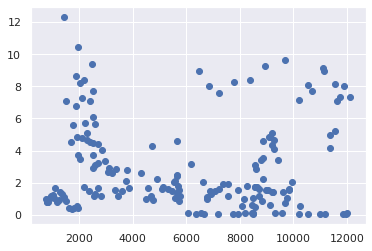

In [ ]:

#proportion renewables and gdp per capita, seems like postive but with clustering? Clustering algo?
plt.scatter(masterdf['NY.GDP.PCAP.KD'], masterdf['NY.ADJ.DNGY.GN.ZS'])

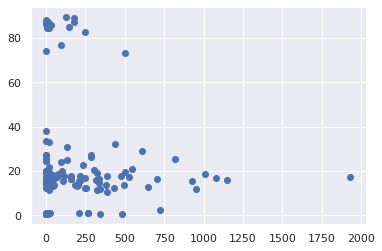

In [ ]:
plt.scatter(masteriffdf['iff'], masteriffdf['EG.ELC.RNEW.ZS'])